# Лабораторная работа №3 "Метод прогонки для линейных дифференциальных уравнений второго порядка с периодическим решением "

## Трегуб Екатерина Сергеевна

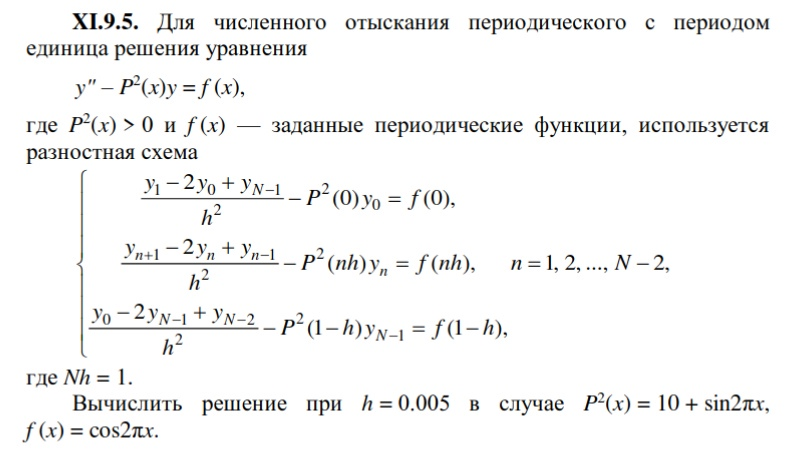

In [3]:
from IPython.display import Image
Image("pog.jpg")

In [26]:
# https://studme.org/224304/matematika_himiya_fizik/vychislenie_periodicheskih_resheniy_lineynyh_obyknovennyh_differentsialnyh_uravneniy_vtorogo_poryadka_pe

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
h = 0.005

size = int(1 / h) + 1
a = [0] * size
b = [0] * size
c = [0] * size

In [29]:
def q_n(n, h):
    return -10 - np.sin(2 * np.pi * n * h)

def f_n(n, h):
    return np.cos(2 * np.pi * n * h)

def fi_n(n, h):
    return f_n(n, h) * h * h

In [30]:
# Круговорот коэффициентов один

# Коэффициент a
for i in range(len(a)):
    a[i] = 1

# Коэффициент b       
for i in range(len(b)):
    b[i] = 2 - q_n(i, h) * (h ** 2)
     
# Коэффициент c
for i in range(len(c)):
    c[i] = 1
        

In [31]:
# Круговорот коэффициентов два

alpha = [0] * size
beta = [0] * size    
gamma = [0] * size    

# Коэффициент alpha
alpha[1] = c[0] / b[0]
for i in range(1, len(alpha) - 1):
    alpha[i + 1] = c[i] / (b[i] - alpha[i] * a[i])
        
# Коэффициент beta
beta[1] = -fi_n(0, h) / b[0]
for i in range(1, len(beta) - 1):
    beta[i + 1] = (a[i] * beta[i] - fi_n(i, h)) / (b[i] - alpha[i] * a[i])

# Коэффициент gamma    
    gamma[1] = a[0] / b[0]
    for i in range(1, len(gamma) - 1):
        gamma[i + 1] = (a[i] * gamma[i]) / (b[i] - alpha[i] * a[i])

In [32]:
# Круговорот коэффициентов три

mu = [0] * size
eta = [0] * size


# Коэффициент mu
mu[-1] = - c[-1] / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])

for i in range(len(mu) - 1, 0, -1):
    mu[i - 1] = alpha[i] * mu[i] + gamma[i] * mu[-1]

        
# Коэффициент eta
eta[-1] = (fi_n(size - 1, h) - a[-1] * beta[-1]) / (a[-1] * (alpha[-1] + gamma[-1]) - b[-1])

for i in range(len(eta) - 1, 0, -1):
    eta[i - 1] = beta[i] + alpha[i] * eta[i] + gamma[i] * eta[-1]

In [35]:
y = [0] * size
x = [0] * size

def _x(x, h):
    for i in range(len(x)):
        x[i] = i * h

def _y(y, mu, eta):
    y[0] = eta[0] / (1 - mu[0])
    for i in range(1, len(y)):
        y[i] = mu[i] * y[0] + eta[i]

_y(y, mu, eta)
_x(x, h)

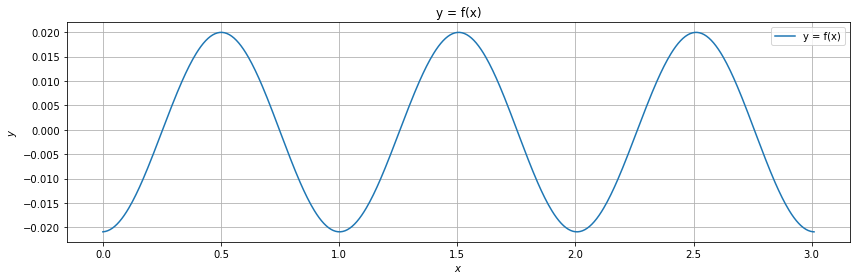

In [36]:
x_plot = [0] * size * 3
_x(x_plot, h)

y_plot = y + y + y

# y = f(x)
plt.figure(figsize = [12, 4])
plt.plot(x_plot, y_plot, label = 'y = f(x)')

plt.title("y = f(x)")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.legend(loc = 'best', bbox_to_anchor = (1, 1))
plt.tight_layout() 
plt.show()

In [37]:
print("y(0) = ", y[0])
print("y(1) = ", y[-1])

y(0) =  -0.020891744564019567
y(1) =  -0.020895759459365816
